<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/adult_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

sns.set_style('darkgrid')

data = pd.read_csv(r'/content/StudenAdult.csv')

data = data * 4 -2

y = pd.read_csv(r'https://gist.githubusercontent.com/gghatano/128e45603b3a133f0fd46a8f262cb65a/raw/372169cae43c9213ac00312cd9672922cb9c7ffc/adult.csv', header=None)

y = y[14].values

y = pd.get_dummies(y, drop_first=True, dtype=int, prefix='target')
y.columns = ['target']

X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)

nn = range(1,51)

trainS = []
testS = []
con_m = []

for _ in nn:

  knn = KNeighborsClassifier(n_neighbors=_, weights='uniform').fit(X_train, y_train)
  pred = knn.predict(X_test)

  trainS.append(knn.score(X_train, y_train))
  testS.append(knn.score(X_test, y_test))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed

In [180]:
from sklearn.metrics import confusion_matrix

neighbor = [i for i, x in zip(nn, testS) if x == np.max(testS)]



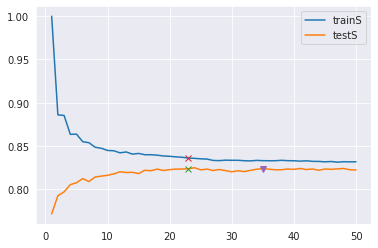

In [181]:
plt.plot(nn, trainS, label='trainS')
plt.plot(nn, testS, label='testS')
plt.plot(neighbor[0] - 1, testS[neighbor[0] - 2], 'x')
plt.plot(neighbor[0] - 1, trainS[neighbor[0] - 2], 'x')
plt.plot(35, testS[34], 'v')
plt.legend(loc=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


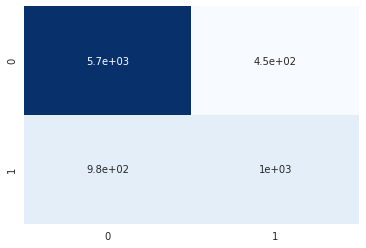

In [172]:
knn =  KNeighborsClassifier(n_neighbors=35).fit(X_train, y_train)

pred = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, pred)

sns.heatmap(cm_knn, annot=True, cmap='Blues', cbar=False)

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_score(y_test, pred)
precision_score(y_test, pred)
recall_score(y_test, pred)
f1_score(y_test, pred)
cm_knn

array([[5708,  451],
       [ 981, 1001]])

In [199]:
kf = KFold(n_splits=10, random_state=0)

Stest = []
Strain = []

for train, test in kf.split(X_train):

  knn = KNeighborsClassifier(n_neighbors=35).fit(X_train.iloc[train,:], y_train.iloc[train,:])

  Stest.append(knn.score(X_train.iloc[test,:], y_train.iloc[test,:]))
  Strain.append(knn.score(X_train.iloc[train,:], y_train.iloc[train,:]))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

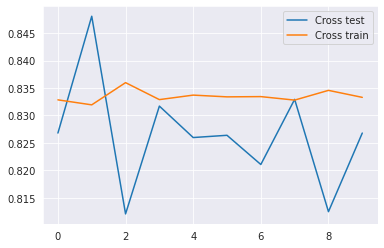

In [200]:
plt.plot(range(0,len(Stest)), Stest, label='Cross test')
plt.plot(range(0, len(Strain)), Strain, label='Cross train')
plt.legend(loc='best')


In [198]:
d